In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
import splinelib as tsp

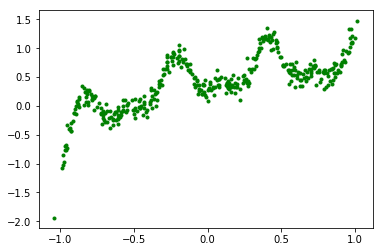

In [2]:
x = np.linspace(0,2,400)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 1 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)/1.5
yy = y.reshape(-1,1)
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')

In [3]:
max_points = 2
lr=0.1
spline1 = tsp.Spline1D(max_points, x, x)
spline2 = tsp.Spline1D(max_points, x, y)
max_points = 7
spline1.n_max = max_points
spline2.n_max = max_points

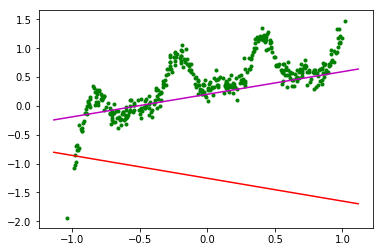

In [4]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline1.X, spline1.Y, color='m')
plt.plot(spline2.X, spline2.Y, color='r')

_______________________
Steps 0
Error 3.2786917457703737


_______________________
Steps 100
Error 0.09302352353035875


_______________________
Steps 200
Error 0.08788544558197721


_______________________
Steps 300
Error 0.08423246153637841


_______________________
Steps 400
Error 0.0819048388951043


_______________________
Steps 500
Error 0.08176276570635643


_______________________
Steps 600
Error 0.08171133267395676


_______________________
Steps 700
Error 0.0816947390933663


_______________________
Steps 800
Error 0.08169246863349887


_______________________
Steps 900
Error 0.08169152487370711


_______________________
Steps 1000
Error 0.08169112945263148


_______________________
Steps 1100
Error 0.08081727785071909


_______________________
Steps 1200
Error 0.08025194590126895


_______________________
Steps 1300
Error 0.07985713321823092


_______________________
Steps 1400
Error 0.07953092400942519


_______________________
Steps 1500
Error 0.07918324896314162


_______



_______________________
Steps 13000
Error 0.01294927324995591


_______________________
Steps 13100
Error 0.012865806700564999


_______________________
Steps 13200
Error 0.012975888597867122


_______________________
Steps 13300
Error 0.012867904297570853


_______________________
Steps 13400
Error 0.012874492820500107


_______________________
Steps 13500
Error 0.012878403188150964


_______________________
Steps 13600
Error 0.012874713134750517


_______________________
Steps 13700
Error 0.012916718524761712


_______________________
Steps 13800
Error 0.012923091958807387


_______________________
Steps 13900
Error 0.012855209336918473


_______________________
Steps 14000
Error 0.012968356461422342


_______________________
Steps 14100
Error 0.012851484551031305


_______________________
Steps 14200
Error 0.012959446159847619


_______________________
Steps 14300
Error 0.012849324208166184


_______________________
Steps 14400
Error 0.012930763339808256


_______________________


TclError: invalid command name "pyimage11"

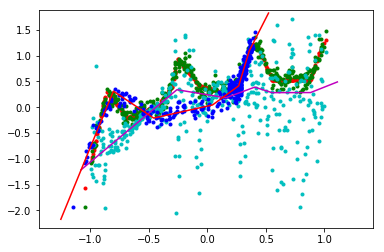

In [5]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    a1 = spline1.forward(x)
    a2 = spline2.forward(a1)
    da2 = a2 - y
    
    da1 = spline2.backward(da2)
    dx = spline1.backward(da1)
    
    spline1.update(lr)
    spline2.update(lr)
    
    if step % 1000 == 0:
        splines = [spline1, spline2]
        for spline in splines:
            spline._combine_linear_points_()
            spline._remove_close_points_()
            spline._remove_no_input_points_()
            spline._add_new_point_()
        
    if step % 100 == 0:
            
        error = (da2**2).mean()
        
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        
        ax.clear()
        epsilon=0.4
        plt.xlim(x.min()-epsilon, x.max()+epsilon)
        plt.ylim(y.min()-epsilon, y.max()+epsilon)
        
        a1 = spline1.forward(x)
        a2 = spline2.forward(a1)
        plt.scatter(x, a2, marker='.', color='r')

        plt.scatter(x, y, marker='.', color='g')
#         plt.scatter(x, a1-da1, marker='.', color='c')
#         plt.scatter(a1, a2-da2, marker='.', color='b')
        plt.scatter(x, a1-da1, marker='.', color='c')
        plt.scatter(a1, a2-da2, marker='.', color='b') #y = a2 - da2

        plt.plot(spline1.X, spline1.Y, color='m')
        plt.plot(spline2.X, spline2.Y, color='r')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

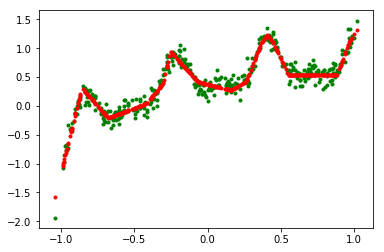

In [6]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a2, marker='.', color='r')

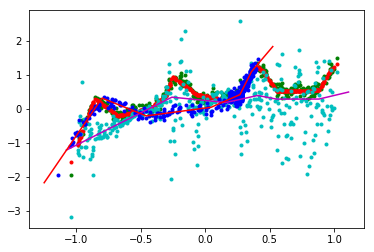

In [7]:
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a2, marker='.', color='r')

plt.scatter(x, a1-da1, marker='.', color='c')
plt.plot(spline1.X, spline1.Y, color='m')

plt.scatter(a1, a2-da2, marker='.', color='b')
plt.plot(spline2.X, spline2.Y, color='r')

### Transfering the piecewise points backwards

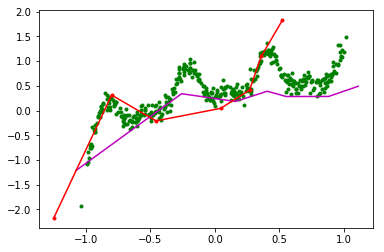

In [19]:
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline1.X, spline1.Y, color='m')
plt.plot(spline2.X, spline2.Y, color='r', marker='.')

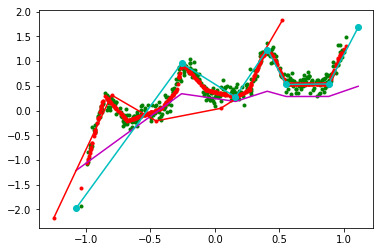

In [20]:
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline1.X, spline1.Y, color='m')
plt.plot(spline2.X, spline2.Y, color='r', marker='.')
plt.scatter(x, a2, marker='.', color='r')


trans_y = spline2.forward(spline1.Y)
plt.plot(spline1.X, trans_y, color='c', marker='o')    

In [21]:
def _calculate_rangeY_(self:tsp.Spline1D, y):
    rangeY = np.zeros((self.n_points-1, y.shape[0]))
    
    def _inrange2_(X, break0, break1): #if x is after
        xmsk1 = X >= break0
        xmsk2 = X < break1
        xmsk12 = np.bitwise_and(xmsk1, xmsk2)
        xmsk3 = X < break0
        xmsk4 = X >= break1
        xmsk34 = np.bitwise_and(xmsk3, xmsk4)
        xs = np.bitwise_or(xmsk12, xmsk34)
        return xs

    for i in range(self.n_points-1):
        if self.n_points-2 == 0:
            rangeY[i] = _inrange2_(y, -np.inf, np.inf)
        elif i==0:
            sign = -1 if self.Y[0]<self.Y[1] else 1
            rangeY[i] = _inrange2_(y, sign*np.inf, self.Y[1])
        elif i== self.n_points-2:
            sign = 1 if self.Y[i]<self.Y[i+1] else -1
            rangeY[i] = _inrange2_(y, self.Y[i], sign*np.inf)
        else:
            rangeY[i] = _inrange2_(y, self.Y[i], self.Y[i+1])
    notInRange = np.where(rangeY.sum(axis=0) == 0)[0]
    #### for the values of y that are missed by the whole curve
    rangeY[:, notInRange] = self.rangeX[:, notInRange]
    return rangeY

def reverse1(self:tsp.Spline1D, y, rangeY=None):
    if rangeY is None:
        rangeY = _calculate_rangeY_(self, y)
        
    x = np.zeros((self.n_points-1, len(y)))
    for i in range(self.n_points-1):
        xpossible = self.diffX[i]/self.diffY[i] *(y - self.Y[i]) + self.X[i]
#         print(xpossible, rangeY, x.shape)
        x[i] = xpossible*rangeY[i]
    return x

In [22]:
x_possible = reverse1(spline1, spline2.X)
# x_possible

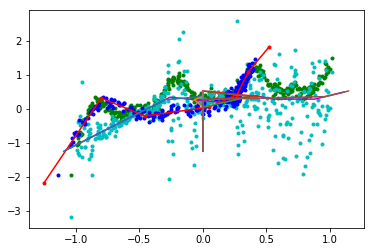

In [23]:
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline1.X, spline1.Y, color='m')
plt.plot(spline2.X, spline2.Y, color='r', marker='.')
for x_p in x_possible:
    plt.plot(x_p, spline2.X)    
    
plt.scatter(x, a1-da1, marker='.', color='c')
plt.scatter(a1, a2-da2, marker='.', color='b')

In [24]:
# # print(spline2.X)
# trans_x = np.zeros_like(spline2.X)
# y_possible = np.zeros_like(spline2.X)
# for i, x_p in enumerate(reversed(x_possible)):
#     y_p = spline1.forward(x_p)
#     mask = (np.abs(y_p - spline2.X) < 1e-15)
#     print(mask)
#     y_possible[mask] = y_p[mask]
#     trans_x[mask] = x_p[mask]
    
# spline2.X, y_possible

In [25]:
x_possible

array([[-1.09498438, -0.85884271, -0.67780471, -0.41357036, -0.29588944,
        -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.06736604,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , -0.        ,  0.26083786,
         0.36809594,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.44910917,  0.        ],
       [-0.        , -0.        , -0.        , -0.        , -0.        ,
         0.        ,  0.        ],
       [-0.        , -0.        ,  0.        ,  0.        ,  0.        ,
         0.96327259,  1.14589117]])

In [26]:
# print(spline2.X)
trans_x = []
y_possible = []
for i, x_p in enumerate(x_possible):
    y_p = spline1.forward(x_p)
    mask = (np.abs(y_p - spline2.X) < 1e-15)
    print(mask)
    for xpm, ypm in zip(x_p[mask], y[mask]):
        trans_x.append(xpm)
        y_possible.append(ypm)
#     y_possible[mask] = y_p[mask]
#     trans_x[mask] = x_p[mask]
trans_x = np.array(trans_x)
ytrans_x = spline2.forward(spline1.forward(trans_x))
y_possible = np.array(y_possible)

spline2.X, y_possible, trans_x

[ True  True  True  True  True False False]
[False False False False  True False False]
[False False False False  True  True False]
[False False False False False  True False]
[False False False False False False False]
[False False False False False  True  True]


(array([-1.24829882, -0.80002345, -0.45635317,  0.04525143,  0.26864892,
         0.35854476,  0.52293413]),
 array([-1.24829882, -0.80002345, -0.45635317,  0.04525143,  0.26864892,
         0.26864892,  0.26864892,  0.35854476,  0.35854476,  0.35854476,
         0.52293413]),
 array([-1.09498438, -0.85884271, -0.67780471, -0.41357036, -0.29588944,
        -0.06736604,  0.26083786,  0.36809594,  0.44910917,  0.96327259,
         1.14589117]))

In [28]:
# plt.scatter(x, y, marker='.', color='g')
# plt.plot(spline1.X, spline1.Y, color='m')
# plt.plot(spline2.X, spline2.Y, color='r', marker='.')
# plt.scatter(x, a2, marker='.', color='r')


# # trans_y = spline2.forward(spline1.Y)
# plt.plot(trans_x, trans_y, color='c', marker='o')    

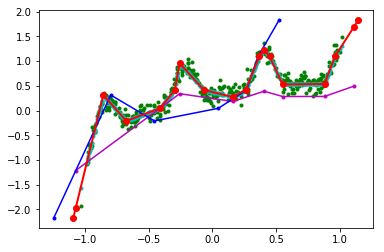

In [29]:
all_X = np.concatenate((spline1.X, trans_x))
all_Y = np.concatenate((trans_y, ytrans_x))
indx = np.argsort(all_X)
all_X = all_X[indx]
all_Y = all_Y[indx]

plt.scatter(x, y, marker='.', color='g')

plt.plot(spline1.X, spline1.Y, color='m', marker='.')
plt.plot(spline2.X, spline2.Y, color='b', marker='.')
plt.scatter(x, a2, marker='.', color='c')

plt.plot(all_X, all_Y, marker='o', c='r', lw=2)

### trying other method -- using nearest point for selecting the best one

In [29]:
min_indx = []
for i in range(len(spline2.X)):
    indx = np.abs(spline2.X[i]-a1).argmin()
    min_indx.append(indx)
min_indx

[0, 64, 158, 196, 219, 367, 278]

In [30]:
spline2.X, a1[min_indx]

(array([-0.87307715, -0.63031648, -0.31710093, -0.07167092,  0.11752677,
         0.34301941,  0.51184282]),
 array([-0.86551968, -0.6097436 , -0.31671433, -0.06666605,  0.12075615,
         0.34041062,  0.47592516]))

In [31]:
x[min_indx]

array([-1.03019047, -0.65987263, -0.21620739, -0.02359611,  0.12077452,
        0.86213022,  0.39435992])

In [200]:
x_possible

array([[-0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.91153917, -1.03683943],
       [-0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.70815786, -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.55368863, -0.        ],
       [-0.        , -0.        , -0.        , -0.        , -0.29758496,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , -0.        , -0.05278911,
         0.        ,  0.        ],
       [ 1.0522508 ,  0.8806325 ,  0.58409713,  0.394942  ,  0.25128817,
        -0.        , -0.        ]])

In [224]:
# print(spline2.X)
trans_x = np.zeros_like(spline2.X)
y_possible = np.zeros_like(spline2.X)
x__possible = np.zeros_like(spline2.X)
for i, x_p in enumerate(x_possible.T):
    print(x_p)
    y_p = spline1.forward(x_p)
    mask = np.abs(x_p - x[min_indx][i]).argmin()
    print(mask)
#     print(np.abs(x_p - x[min_indx][i]))
    y_possible[i] = y_p[mask]
    x__possible[i] = 
    trans_x[i] = x_p[mask]
    
spline2.X, y_possible

[-0.        -0.         0.        -0.        -0.         1.0522508]
5
[-0.        -0.         0.        -0.        -0.         0.8806325]
5
[-0.         -0.          0.         -0.         -0.          0.58409713]
5
[-0.       -0.        0.       -0.       -0.        0.394942]
5
[-0.         -0.          0.         -0.29758496 -0.05278911  0.25128817]
5
[-0.91153917 -0.70815786 -0.55368863 -0.          0.         -0.        ]
0
[-1.03683943 -0.         -0.         -0.          0.         -0.        ]
0


(array([-0.66051713, -0.49631484, -0.21259342, -0.0316121 ,  0.10583412,
         0.56312553,  1.22085335]),
 array([-0.66051713, -0.49631484, -0.21259342, -0.0316121 ,  0.10583412,
         0.56312553,  1.22085335]))

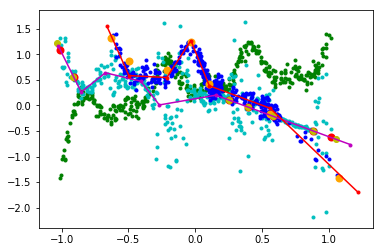

In [247]:
plt.scatter(x, y, marker='.', color='g')
plt.plot(spline1.X, spline1.Y, color='m', marker='.')
plt.plot(spline2.X, spline2.Y, color='r', marker='.') 
    
plt.scatter(x, a1-da1, marker='.', color='c')
plt.scatter(a1, a2-da2, marker='.', color='b')

plt.scatter(x[min_indx], a1[min_indx], marker='o', lw=2, color='r')
plt.scatter(a1[min_indx], y[min_indx], marker='o', lw=2, color='orange')
plt.scatter(trans_x, y_possible, marker='o', lw=1, color='y')

In [222]:
trans_x, x[min_indx]

(array([ 1.0522508 ,  0.8806325 ,  0.58409713,  0.394942  ,  0.25128817,
        -0.91153917, -1.03683943]),
 array([ 1.01740006,  0.88209557,  0.58137339,  0.3966678 ,  0.25123465,
        -0.91122544, -1.00882428]))

In [225]:
trans_x, spline2.Y

(array([ 1.0522508 ,  0.8806325 ,  0.58409713,  0.394942  ,  0.25128817,
        -0.91153917, -1.03683943]),
 array([ 1.54254957,  0.58186946,  0.54435362,  1.26655186,  0.38393003,
        -0.05759222, -1.70028518]))

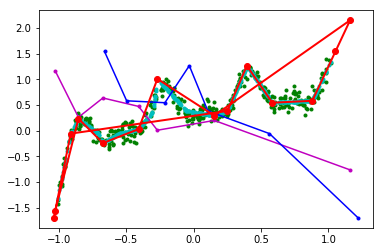

In [230]:
all_Y = np.concatenate((trans_y, spline2.Y))
all_X = np.concatenate((spline1.X, trans_x))
# indx = np.argsort(all_X)
# all_X = all_X[indx]
# all_Y = all_Y[indx]

plt.scatter(x, y, marker='.', color='g')

plt.plot(spline1.X, spline1.Y, color='m', marker='.')

plt.plot(spline2.X, spline2.Y, color='b', marker='.')
plt.scatter(x, a2, marker='.', color='c')

plt.plot(all_X, all_Y, marker='o', c='r', lw=2)